In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const


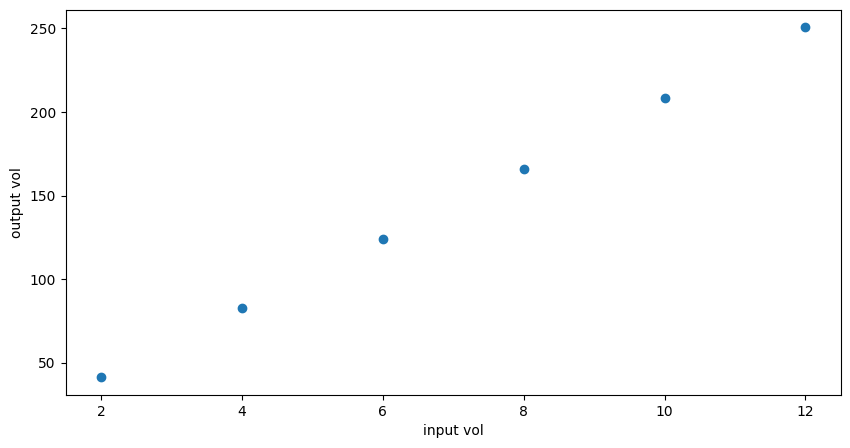

In [5]:

data = np.loadtxt('data/no_mag.txt', skiprows=3)

# Data
input_vol = data[:, 0]
output_vol = data[:, 1]
output_current = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(input_vol, output_vol, 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.show()


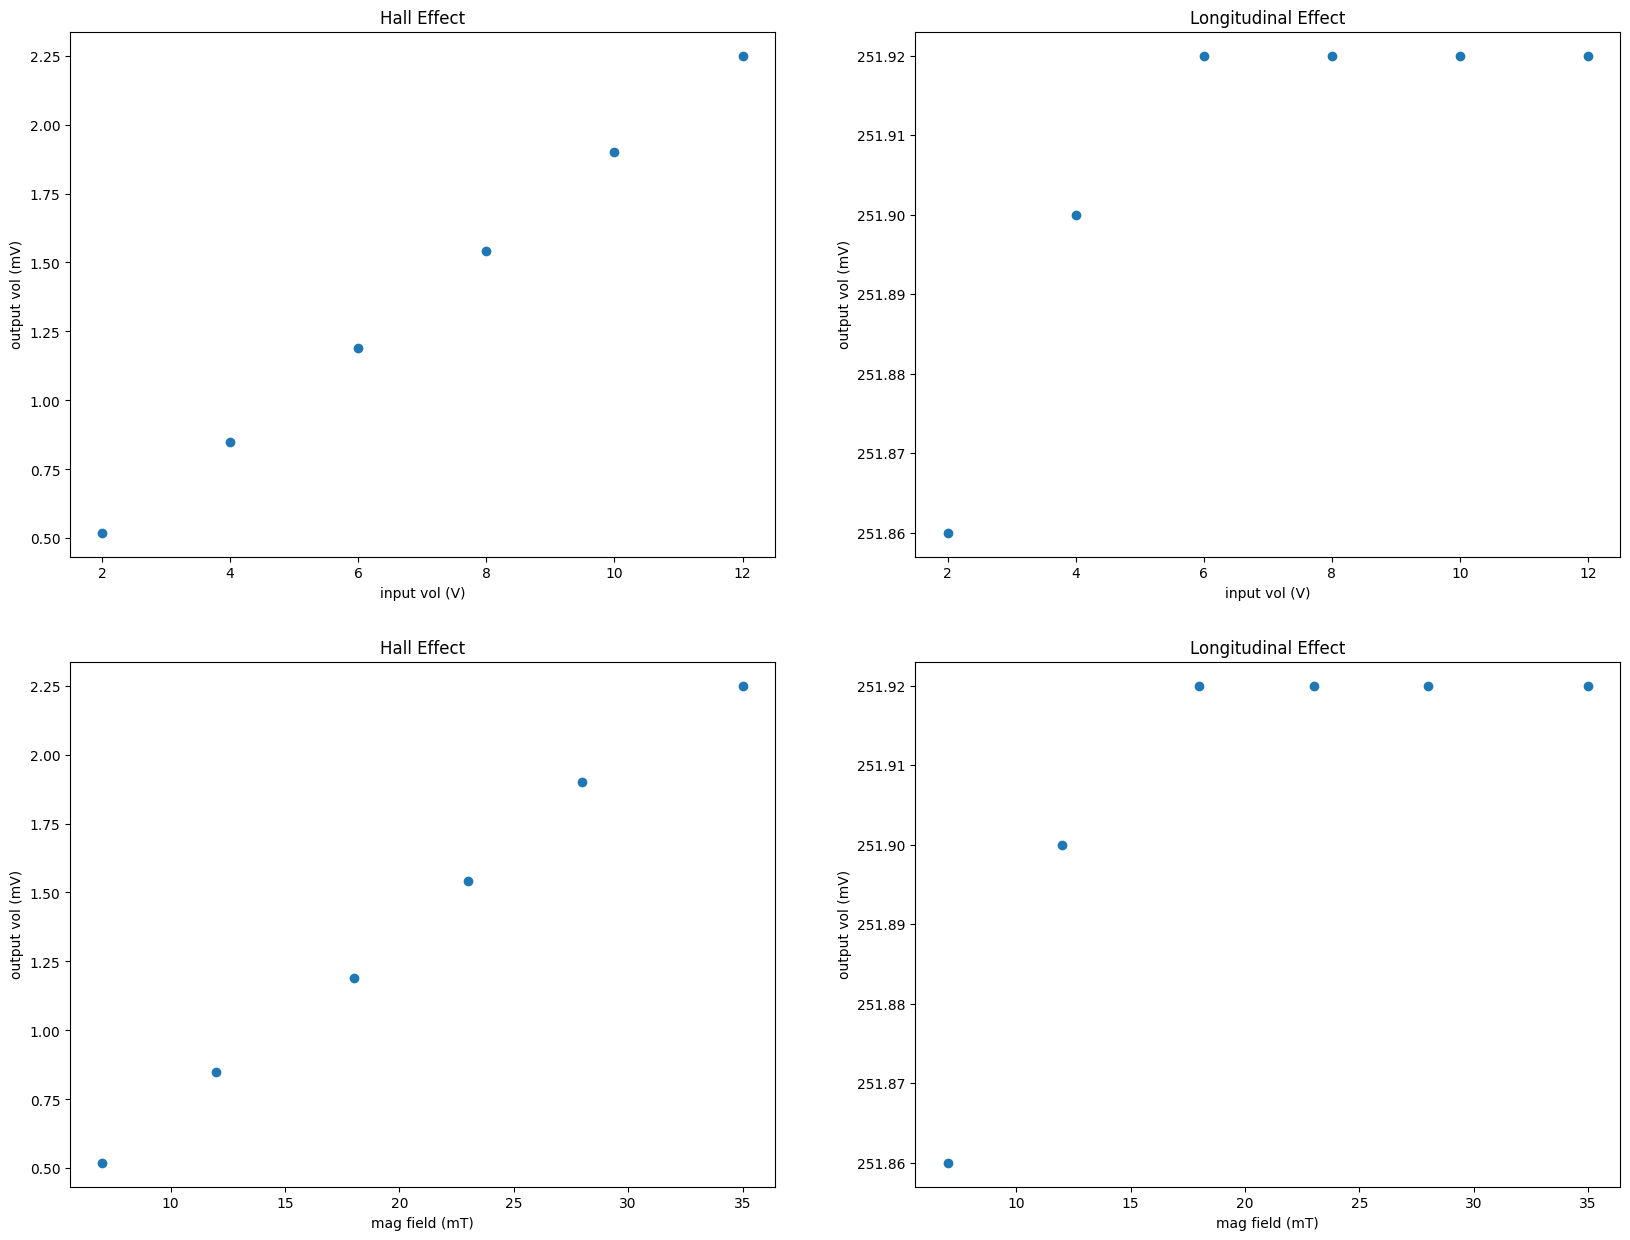

5646562120537479.0 0.4912795966857019


In [22]:
data_hall = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
W = 100e-6
L = 300e-6

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data_hall[:, 0], data_hall[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.subplot(2,2,3)
plt.plot(data_hall[:, 3], data_hall[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.show()

def r_hall_2d(B, I, Vh):
    return Vh/(I*B*1e-3)

def res(V,I):
    return (V*1e-3)/(I*1e-6)

def r_per_sq(res, width, length):
    return (res*width)/length

def num_per_sq(r_hall_2d):
    return 1/(r_hall_2d*const.e)

def mobility(r_per_sq, n_per_sq):
    return 1/(n_per_sq*r_per_sq*const.e)

n_sq = []
for i in np.arange(len(data_hall[:, 3])):
    n_sq.append(num_per_sq(r_hall_2d(data_hall[i, 3], data_hall[i, 1], data_hall[i, 2])))

n_sq_mean = np.mean(np.array(n_sq))

nu = []
for i in np.arange(len(data_long[:, 2])):
    nu.append(mobility(r_per_sq(res(data_long[i, 1], data_long[i, 2]),W,L), n_sq_mean))

nu = np.mean(np.array(nu))

print(n_sq_mean,nu)


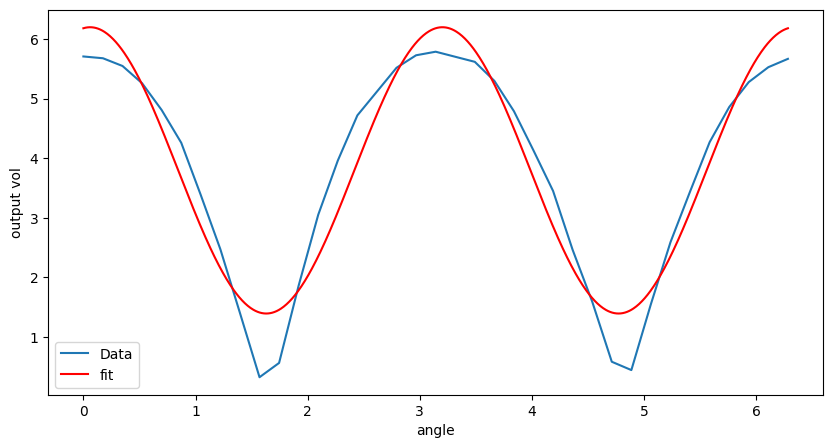

[ 2.40548323 -0.12027382  3.7959637 ]
the standard deviation is 0.015006714974806728 on the amplitude, and 0.0026046484803369666 on the phase


In [72]:
data = np.loadtxt('data/angle.txt', skiprows=2)
vol = data[:, 0]
angle = np.deg2rad(data[:, 1])
# x and b are in degrees, a is an amplitude constant

def func(x, a, b,c):
    return (a*np.cos(2*x + b)+c)

popt, pcov = curve_fit(func, angle, vol,p0 = (2.8,0,3))

angle_range = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(angle, vol, label='Data')
plt.plot(angle_range, func(angle_range, *popt), 'r-', label='fit')
plt.xlabel('angle')
plt.ylabel('output vol')
plt.legend()
plt.show()
print(popt)
print(f'the standard deviation is {np.abs(np.diag(pcov)[0])} on the amplitude, and {np.abs(np.diag(pcov)[1])} on the phase')


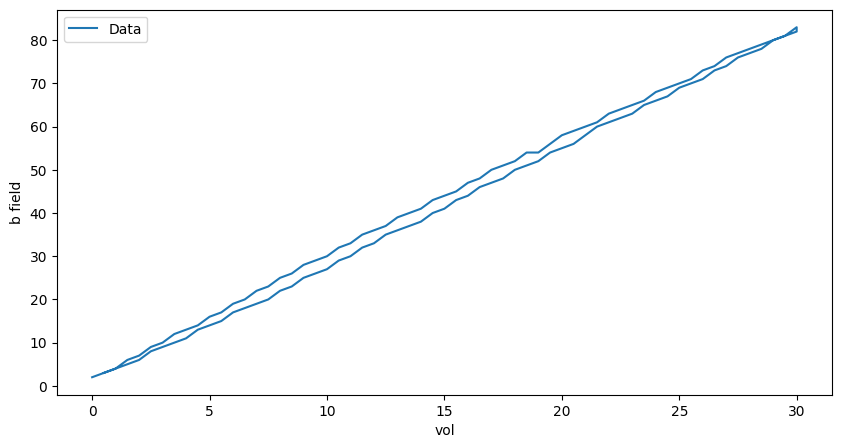

In [67]:
data =np.loadtxt('data/b_field_calibration.txt', skiprows=2)
vol = data[:, 0]
current = data[:, 1]
b_field = data[:, 2]
# x and b are in degrees, a is an amplitude constant
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field, label='Data')

plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()
